In [1]:
#https://toruseo.jp/UXsim/docs/index.html

from uxsim import *
import itertools

seed = None

W = World(
    name="",
    deltan=5,
    tmax=3600, #1 hour simulation
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=seed,
    duo_update_time=600
)
random.seed(seed)

# network definition
"""
    N1  N2  N3  N4 
    |   |   |   |
W1--I1--I2--I3--I4-<E1
    |   |   |   |
    v   ^   v   ^
    S1  S2  S3  S4
"""

signal_time = 20
sf_1=1
sf_2=1

I1 = W.addNode("I1", 1, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I2 = W.addNode("I2", 2, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I3 = W.addNode("I3", 3, 0, signal=[signal_time*sf_1,signal_time*sf_2])
I4 = W.addNode("I4", 4, 0, signal=[signal_time*sf_1,signal_time*sf_2])
W1 = W.addNode("W1", 0, 0)
E1 = W.addNode("E1", 5, 0)
N1 = W.addNode("N1", 1, 1)
N2 = W.addNode("N2", 2, 1)
N3 = W.addNode("N3", 3, 1)
N4 = W.addNode("N4", 4, 1)
S1 = W.addNode("S1", 1, -1)
S2 = W.addNode("S2", 2, -1)
S3 = W.addNode("S3", 3, -1)
S4 = W.addNode("S4", 4, -1)

#E <-> W direction: signal group 0
for n1,n2 in [[W1, I1], [I1, I2], [I2, I3], [I3, I4], [I4, E1]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=50, jam_density=0.2, number_of_lanes=3, signal_group=0)
    
#N -> S direction: signal group 1
for n1,n2 in [[N1, I1], [I1, S1], [N3, I3], [I3, S3]]:
    W.addLink(n1.name+n2.name, n1, n2, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)

#S -> N direction: signal group 2
for n1,n2 in [[N2, I2], [I2, S2], [N4, I4], [I4, S4]]:
    W.addLink(n2.name+n1.name, n2, n1, length=500, free_flow_speed=30, jam_density=0.2, signal_group=1)
    

# random demand definition every 30 seconds
dt = 30
demand = 2 #average demand for the simulation time
demands = []
for t in range(0, 3600, dt):
    dem = random.uniform(0, demand)
    for n1, n2 in [[N1, S1], [S2, N2], [N3, S3], [S4, N4]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.25)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})
    for n1, n2 in [[E1, W1], [N1, W1], [S2, W1], [N3, W1],[S4, W1]]:
        W.adddemand(n1, n2, t, t+dt, dem*0.75)
        demands.append({"start":n1.name, "dest":n2.name, "times":{"start":t,"end":t+dt}, "demand":dem})

W.exec_simulation()
W.analyzer.print_simple_stats()

simulation setting:
 scenario name: 
 simulation duration:	 3600 s
 number of vehicles:	 13645 veh
 total road length:	 6500 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 720
 number of platoons:	 2729
 number of links:	 13
 number of nodes:	 14
 setup time:		 0.52 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      575 vehs|   4.3 m/s|     0.74 s
    1200 s|      565 vehs|   4.5 m/s|     1.38 s
    1800 s|      575 vehs|   4.5 m/s|     1.99 s
    2400 s|      560 vehs|   4.6 m/s|     2.64 s
    3000 s|      570 vehs|   4.5 m/s|     3.13 s
    3595 s|      590 vehs|   2.5 m/s|     3.61 s
 simulation finished
results:
 average speed:	 6.9 m/s
 number of completed trips:	 6900 / 13645
 average travel time of trips:	 983.3 s
 average delay of trips:	 942.9 s
 delay ratio:			 0.959


In [2]:
W.analyzer.basic_to_pandas()

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,13645,6900,6784700.0,983.289855,6.505867e+06,942.879227


In [3]:
W.analyzer.link_to_pandas()

,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time
0,I1W1,5690,5,10.000000,11.131944,3.073739
1,I2I1,4240,65,10.000000,41.604167,11.856912
2,I3I2,3105,80,10.000000,82.208333,19.254824
3,I4I3,1970,100,10.000000,150.534722,38.495475
4,E1I4,855,105,10.000000,458.812500,174.411151
5,N1I1,1795,50,16.666667,102.421296,12.628108
6,I1S1,340,0,16.666667,15.018519,0.174703
7,N3I3,1510,60,16.666667,142.615741,24.379691
8,I3S3,290,5,16.666667,15.018519,0.174703
9,I2N2,290,0,16.666667,15.018519,0.174703


In [4]:
W.analyzer.link_traffic_state_to_pandas().head(20)

,link,t,x,delta_t,delta_x,q,k,v
0,I1W1,0,0,120,250,1.130556,0.024028,47.052023
1,I1W1,0,250,120,250,1.026389,0.020528,50.000000
2,I1W1,120,0,120,250,1.473611,0.030889,47.706835
3,I1W1,120,250,120,250,1.543056,0.030861,50.000000
4,I1W1,240,0,120,250,1.626389,0.034167,47.601626
5,I1W1,240,250,120,250,1.572222,0.031444,50.000000
6,I1W1,360,0,120,250,1.637500,0.036778,44.524169
7,I1W1,360,250,120,250,1.691667,0.033833,50.000000
8,I1W1,480,0,120,250,1.508333,0.030167,50.000000
9,I1W1,480,250,120,250,1.430556,0.028611,50.000000


In [5]:
W.analyzer.od_to_pandas()

,orig,dest,total_trips,completed_trips,free_travel_time,average_travel_time,stddiv_travel_time
0,N1,S1,555,340,33.333333,766.764706,441.434630
1,S2,N2,555,290,33.333333,956.120690,568.173907
2,N3,S3,555,290,33.333333,919.224138,552.639280
3,S4,N4,555,290,33.333333,910.948276,561.168314
4,E1,W1,2285,800,50.000000,1044.468750,733.410398
5,N1,W1,2285,1450,26.666667,812.224138,449.497192
6,S2,W1,2285,1175,36.666667,1018.829787,581.996027
7,N3,W1,2285,1160,46.666667,1054.051724,567.352979
8,S4,W1,2285,1105,56.666667,1160.950226,577.593504


In [6]:
W.analyzer.vehicles_to_pandas().head(20)

,name,dn,orig,dest,t,link,x,s,v
0,0,5,N1,S1,20,N1I1,0.0,125.0,30.0
1,0,5,N1,S1,25,N1I1,100.0,175.0,20.0
2,0,5,N1,S1,30,N1I1,250.0,175.0,30.0
3,0,5,N1,S1,35,N1I1,400.0,-1.0,30.0
4,0,5,N1,S1,40,I1S1,50.0,-1.0,20.0
5,0,5,N1,S1,45,I1S1,200.0,-1.0,30.0
6,0,5,N1,S1,50,I1S1,350.0,-1.0,30.0
7,0,5,N1,S1,50,trip_end,-1.0,-1.0,-1.0
8,1,5,S2,N2,20,S2I2,0.0,125.0,30.0
9,1,5,S2,N2,25,S2I2,100.0,175.0,20.0


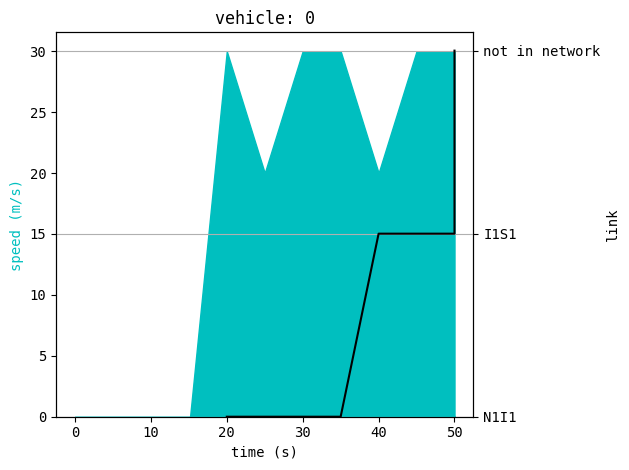

In [7]:
W.analyzer.plot_vehicle_log("0")

In [8]:
W.analyzer.network_anim(detailed=0, network_font_size=1, figsize=(6,6))

 generating animation...


  0%|          | 0/30 [00:00<?, ?it/s]

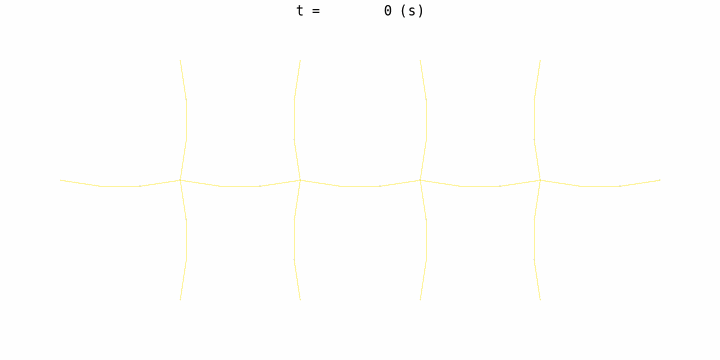

In [9]:
from IPython.display import display, Image
with open("out/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [10]:
W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5, network_font_size=1)


 generating animation...


  0%|          | 0/360 [00:00<?, ?it/s]

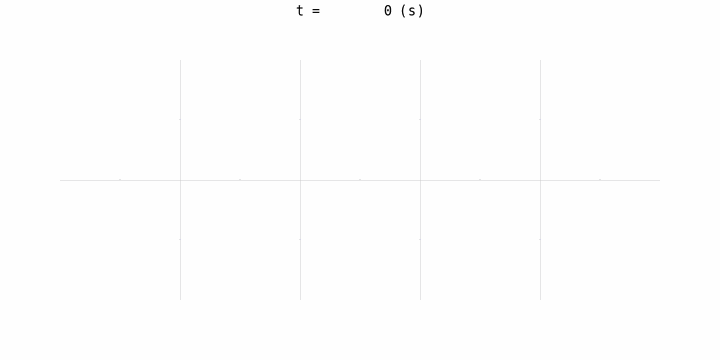

In [11]:
with open("out/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [12]:
df = W.analyzer.link_to_pandas()
df['av_demand'] = (df['traffic_volume']+df['vehicles_remain'])/3600
df['signal_time'] = signal_time
df

,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time,av_demand,signal_time
0,I1W1,5690,5,10.000000,11.131944,3.073739,1.581944,20
1,I2I1,4240,65,10.000000,41.604167,11.856912,1.195833,20
2,I3I2,3105,80,10.000000,82.208333,19.254824,0.884722,20
3,I4I3,1970,100,10.000000,150.534722,38.495475,0.575000,20
4,E1I4,855,105,10.000000,458.812500,174.411151,0.266667,20
5,N1I1,1795,50,16.666667,102.421296,12.628108,0.512500,20
6,I1S1,340,0,16.666667,15.018519,0.174703,0.094444,20
7,N3I3,1510,60,16.666667,142.615741,24.379691,0.436111,20
8,I3S3,290,5,16.666667,15.018519,0.174703,0.081944,20
9,I2N2,290,0,16.666667,15.018519,0.174703,0.080556,20
